/Users/Ubaid/Library/CloudStorage/OneDrive-UniversidadedoAlgarve/analysis-dir/ts-data/env/lib/python3.11/site-packages/entropy/fractal.py:126: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('float64(float64[:], int32)')


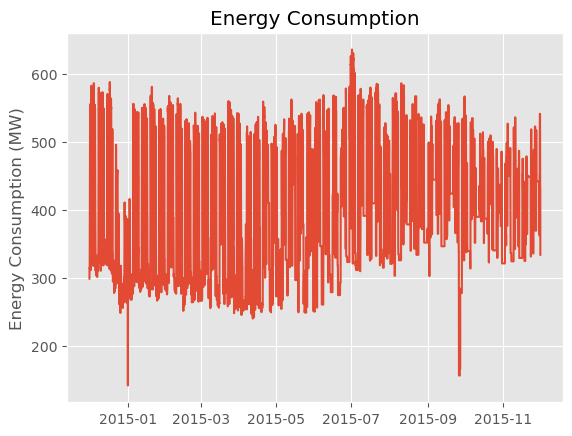

/var/folders/p5/4n4tz9b556x0wctr33bl1jkh0000gp/T/ipykernel_8206/1698612933.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Office_Garman'] = interpolated_values
Calculating Entropy: 100%|████████████████████████| 6/6 [00:00<00:00, 94.15it/s]


ValueError: Expected sequence of coefficient arrays.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from scipy.interpolate import CubicSpline
import pywt
from entropy import sample_entropy
from tqdm import tqdm
import warnings

# Set Plotting Styles
plt.style.use('ggplot')

# Ignore all runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Read the data from CSV file
newData = pd.read_csv("Office_Garman.csv", index_col="timestamp", parse_dates=True)
# Remove duplicate entries
newData = newData.drop_duplicates()
# Set the frequency to hourly
newData = newData.asfreq('H')
# Fill missing values using forward fill method
newData = newData.fillna(method='ffill')

# Visualizing Energy Consumption Data
plt.plot(newData.index, newData['Office_Garman'])
plt.title('Energy Consumption')
plt.ylabel('Energy Consumption (MW)')
plt.show()

# Define the split date
split_date = '2015-09-30'

# Split the data into training and testing sets
train = newData.loc[:split_date]
test = newData.loc[split_date:]

# DBSCAN detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(train['Office_Garman'].values.reshape(-1, 1))
labels = dbscan.labels_

# Spline Interpolation
timestamps = train.index.to_julian_date()
values = train['Office_Garman'].values

# Create a cubic spline object
spline = CubicSpline(timestamps, values)

# Interpolate missing values using the spline function
interpolated_values = spline(timestamps)

train['Office_Garman'] = interpolated_values

# DWT decomposition
coeffs = pywt.wavedec(train['Office_Garman'].values, 'db4', level=5)

# FuzzyEn entropy calculation
entropy_values = []
with tqdm(total=len(coeffs), desc="Calculating Entropy") as pbar:
    for coeff in coeffs:
        entropy = sample_entropy(coeff)
        entropy_values.append(entropy)
        pbar.update(1)

# Divide components into high-frequency and low-frequency
high_frequency = coeffs[0]  # Approximation coefficients
low_frequency = coeffs[1:]  # Detail coefficients

# Calculate actual energy consumption value
actual_energy_consumption = pywt.waverec(high_frequency, 'db4')

# Update the code above with the specific modifications required for your dataset and algorithms.
